In [1]:
# Aggregate plots of loops
# 1. takes file: .mcool file and loop file
#    applies tool: cooler and cooltools
#    produces output: Aggregate plots


# If you are a developer, you may want to reload the packages on the fly
# Jupyter has a magic for this particular purpose

%load_ext autoreload
%autoreload 2

# import standard python libraries

import matplotlib as mpl
%matplotlib inline
mpl.rcParams['figure.dpi'] = 300
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import os, subprocess

# import libraries for biological data analysis

from coolpuppy import coolpup
from coolpuppy.lib import numutils
from coolpuppy.lib.puputils import divide_pups
from coolpuppy import plotpup
import cooler
import bioframe
import cooltools
from cooltools import expected_cis, expected_trans
from cooltools.lib import plotting

In [2]:
# set resolution
# load cool file

resolution = 5000
clr_1 = cooler.Cooler(f'DNaseC_R3D7_DMSO4h.mcool::/resolutions/{resolution}')
clr_3 = cooler.Cooler(f'DNaseC_R3D7_dTAG4h.mcool::/resolutions/{resolution}')

In [3]:
# Use bioframe to fetch the genomic features

hg38_chromsizes = bioframe.fetch_chromsizes('hg38')
hg38_cens = bioframe.fetch_centromeres('hg38')
hg38_arms = bioframe.make_chromarms(hg38_chromsizes, hg38_cens)

# Select only chromosomes that are present in the cooler.

hg38_arms = hg38_arms.set_index("chrom").loc[clr_1.chromnames].reset_index()

# call this to automaticly assign names to chromosomal arms

hg38_arms = bioframe.make_viewframe(hg38_arms)

In [4]:
# load loop coordinates

sites = bioframe.read_table('/mnt/disk5/1/DNaseC/DNaseC_paper/293T/regular_file/DNaseC_293T_total_UMI_wlink_nochrCLMT_noheader.bedpe', schema='bedpe')
#sites = ctcf.sort_values('score', ascending=False).head(1000)

In [5]:
# Calculate expected interactions for chromosome arms

expected_1 = expected_cis(
    clr_1,
    ignore_diags=2,
    view_df=hg38_arms,
    chunksize=1000000, 
    nproc=80)

# perform pileups

pup_1 = coolpup.pileup(clr_1, sites, features_format='bedpe', view_df=hg38_arms, 
                      #local=True,
                      #flip_negative_strand=True, 
                      expected_df=expected_1,
                      #nshifts=10,
                      flank=200000, 
                      mindist=5000, 
                      #maxdist=600_000,
                     #subset=2000, 
                     #seed=1,
                      min_diag=2, 
                      nproc=80)

INFO:coolpuppy:('chr10_p', 'chr10_p'): 380
INFO:coolpuppy:('chr1_p', 'chr1_p'): 1066
INFO:coolpuppy:('chr11_p', 'chr11_p'): 425
INFO:coolpuppy:('chr1_q', 'chr1_q'): 1100
INFO:coolpuppy:('chr12_p', 'chr12_p'): 317
INFO:coolpuppy:('chr11_q', 'chr11_q'): 618
INFO:coolpuppy:('chr10_q', 'chr10_q'): 930
INFO:coolpuppy:('chr12_q', 'chr12_q'): 921
INFO:coolpuppy:('chr13_q', 'chr13_q'): 835
INFO:coolpuppy:('chr14_q', 'chr14_q'): 764
INFO:coolpuppy:('chr16_p', 'chr16_p'): 114
INFO:coolpuppy:('chr15_q', 'chr15_q'): 641
INFO:coolpuppy:('chr17_p', 'chr17_p'): 133
INFO:coolpuppy:('chr16_q', 'chr16_q'): 238
INFO:coolpuppy:('chr18_p', 'chr18_p'): 87
INFO:coolpuppy:('chr17_q', 'chr17_q'): 460
INFO:coolpuppy:('chr19_p', 'chr19_p'): 142
INFO:coolpuppy:('chr18_q', 'chr18_q'): 400
INFO:coolpuppy:('chr19_q', 'chr19_q'): 157
INFO:coolpuppy:('chr20_p', 'chr20_p'): 210
INFO:coolpuppy:('chr2_p', 'chr2_p'): 704
INFO:coolpuppy:('chr20_q', 'chr20_q'): 238
INFO:coolpuppy:('chr21_q', 'chr21_q'): 230
INFO:coolpuppy:(

INFO:coolpuppy:Can't set both vmin and vmax and get symmetrical scale. Plotting non-symmetrical


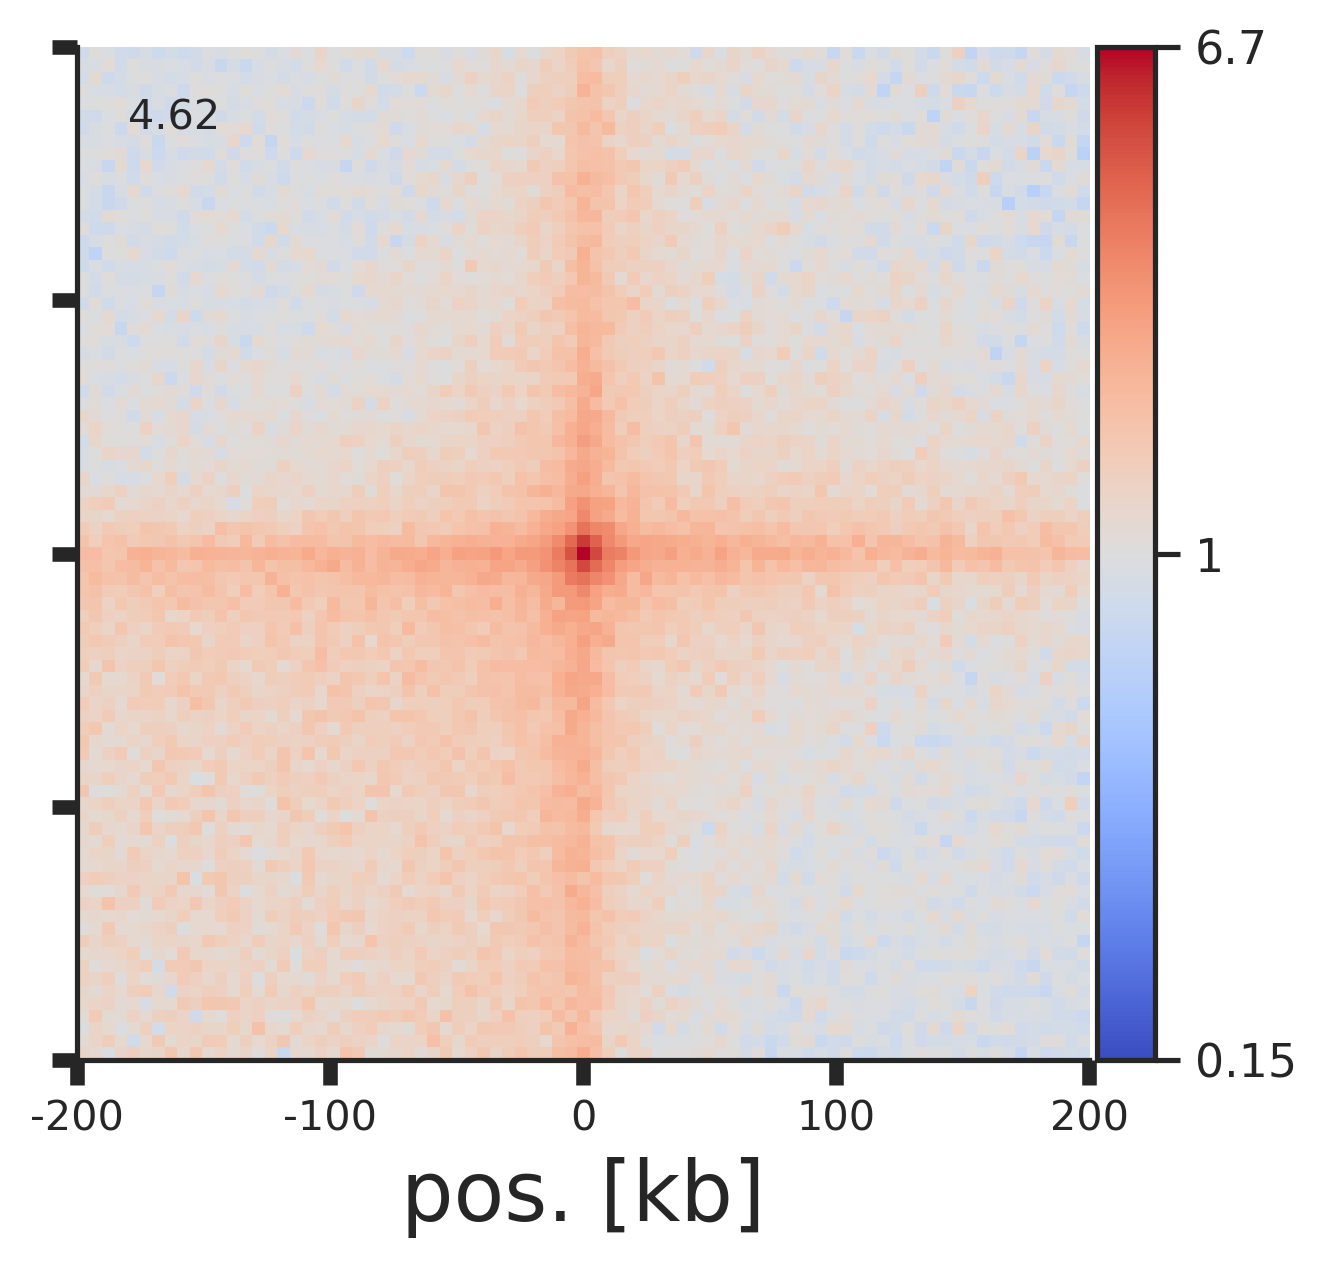

In [6]:
# visualize

fig1 = plotpup.plot(pup_1,
             score=True, 
             cmap='coolwarm', 
             scale='log',
             sym=True, 
             vmax=6.7,
             vmin=0.15,
             height=5, 
             plot_ticks=True)

In [7]:
# save .pdf file

fig1.savefig('DMSO4h.pdf')

In [8]:
# Calculate expected interactions for chromosome arms

expected_3= expected_cis(
    clr_3,
    ignore_diags=2,
    view_df=hg38_arms,
    chunksize=1000000, 
    nproc=80)


# to perform pileups
pup_3 = coolpup.pileup(clr_3, sites, features_format='bedpe', view_df=hg38_arms, 
                      #local=True,
                      #flip_negative_strand=True, 
                      expected_df=expected_3,
                      #nshifts=10,
                      flank=200000, 
                      mindist=5000, 
#                       maxdist=600_000,
                     #subset=2000, 
                     #seed=1,
                      min_diag=2, 
                      nproc=80)

INFO:coolpuppy:('chr10_p', 'chr10_p'): 380
INFO:coolpuppy:('chr11_p', 'chr11_p'): 425
INFO:coolpuppy:('chr1_p', 'chr1_p'): 1066
INFO:coolpuppy:('chr1_q', 'chr1_q'): 1100
INFO:coolpuppy:('chr12_p', 'chr12_p'): 317
INFO:coolpuppy:('chr11_q', 'chr11_q'): 618
INFO:coolpuppy:('chr10_q', 'chr10_q'): 930
INFO:coolpuppy:('chr12_q', 'chr12_q'): 921
INFO:coolpuppy:('chr13_q', 'chr13_q'): 835
INFO:coolpuppy:('chr16_p', 'chr16_p'): 114
INFO:coolpuppy:('chr14_q', 'chr14_q'): 764
INFO:coolpuppy:('chr17_p', 'chr17_p'): 133
INFO:coolpuppy:('chr16_q', 'chr16_q'): 238
INFO:coolpuppy:('chr15_q', 'chr15_q'): 641
INFO:coolpuppy:('chr18_p', 'chr18_p'): 87
INFO:coolpuppy:('chr17_q', 'chr17_q'): 460
INFO:coolpuppy:('chr19_p', 'chr19_p'): 142
INFO:coolpuppy:('chr18_q', 'chr18_q'): 400
INFO:coolpuppy:('chr19_q', 'chr19_q'): 157
INFO:coolpuppy:('chr20_p', 'chr20_p'): 210
INFO:coolpuppy:('chr20_q', 'chr20_q'): 238
INFO:coolpuppy:('chr2_p', 'chr2_p'): 704
INFO:coolpuppy:('chr21_q', 'chr21_q'): 230
INFO:coolpuppy:(

INFO:coolpuppy:Can't set both vmin and vmax and get symmetrical scale. Plotting non-symmetrical


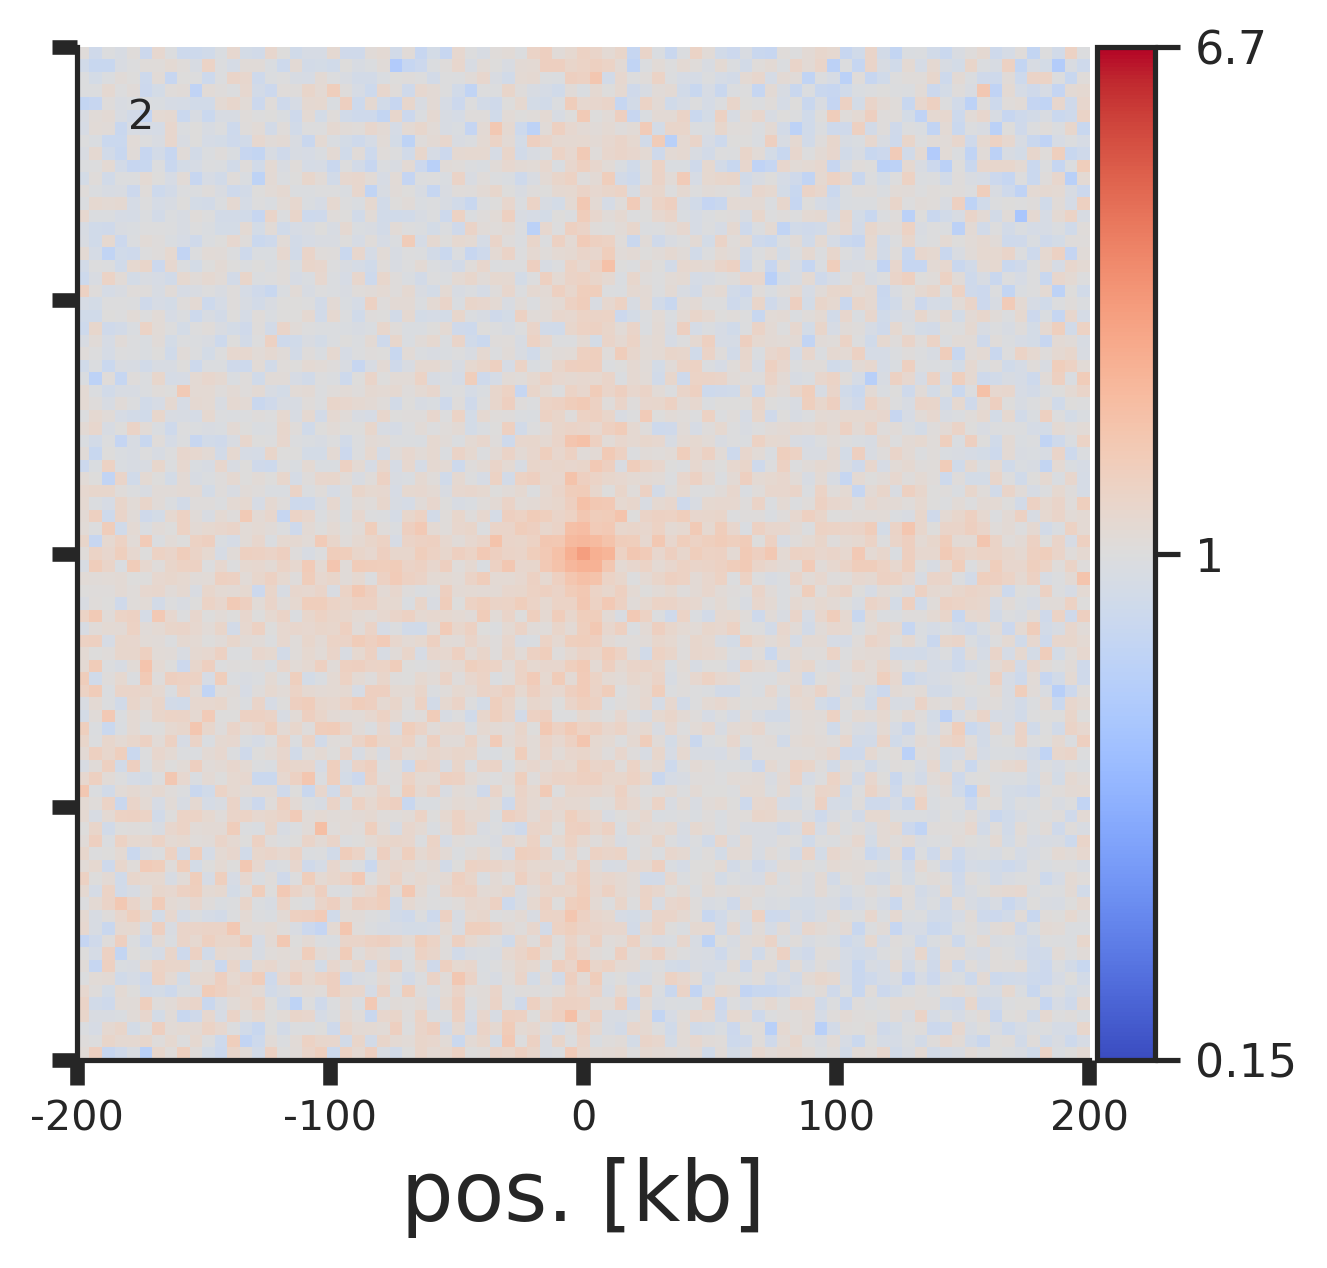

In [9]:
# to visualize

fig3 = plotpup.plot(pup_3,
             score=True, 
             cmap='coolwarm', 
             scale='log',
             sym=True, 
              vmax=6.7,
              vmin=0.15,
             height=5, 
             plot_ticks=True
            )

In [10]:
# save .pdf file

fig3.savefig('dTAG4h.pdf')